In [ ]:
import sys
!{sys.executable} -m pip install imutils

In [ ]:
!{sys.executable} -m pip install opencv-python

In [1]:
import os

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import keras
import imutils
import cv2
import h5py
import matplotlib
import random

from scipy import ndimage, misc
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Collect the training dataset

In [2]:
train_dir = 'project3_data/data/train_images/'
label_dir = 'project3_data/data/train_labels/'
train_images = {}
train_labels = {}

filenames = []
for dirs, subdirs, files in os.walk(train_dir):
    for name in files:
        filenames.append(name)
        path_to_use = os.path.join(dirs, name)
        if path_to_use.endswith('.npy'):
            train_images[name]=np.load(path_to_use)
            train_labels[name]=np.load(os.path.join(label_dir, name))
print(train_images)  

{'sample-0.npy': array([[[23, 18, 19, ...,  6,  3, 12],
        [14,  9, 15, ..., 10,  5, 10],
        [ 3,  1,  7, ..., 11,  6, 10],
        ...,
        [ 3,  1,  5, ...,  6,  8,  4],
        [ 7, 11, 10, ...,  3,  9,  7],
        [21, 23, 21, ...,  4,  7,  7]],

       [[15, 17, 12, ...,  5,  4,  4],
        [28, 19, 12, ...,  4, 12, 11],
        [25, 17, 16, ...,  3,  4,  6],
        ...,
        [ 0,  4,  6, ...,  2,  1,  3],
        [ 2,  6,  6, ...,  1,  1,  7],
        [ 8,  7,  8, ...,  1,  2,  5]],

       [[24, 21, 15, ...,  6,  2,  6],
        [15, 18, 14, ...,  2,  6,  4],
        [ 2, 12, 10, ...,  5,  8,  7],
        ...,
        [ 9, 13,  8, ...,  6,  4,  3],
        [ 7,  7,  5, ...,  3,  4,  6],
        [ 8,  6,  5, ...,  4,  2,  8]],

       ...,

       [[45, 29, 27, ..., 32, 44, 29],
        [41, 34, 30, ..., 31, 38, 28],
        [34, 32, 32, ..., 40, 35, 20],
        ...,
        [ 8,  9, 16, ..., 11, 11,  8],
        [14, 11, 14, ...,  7, 10, 13],
        [13, 10

## 5 different ways/packages to implement rotation (no differences observed)

Rotation angle: 145°
Output1 shape: (256, 256)
Output2 shape: (256, 256)
Output3 shape: (256, 256)
Rotated image: uint16


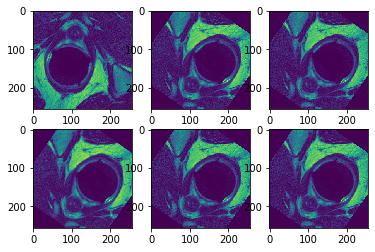

In [3]:
image = train_images['sample-0.npy'][0]
rotate = random.randint(0, 360) 
rotate = 145

from scipy import ndimage
output1 = ndimage.rotate(image, rotate, reshape=False)

from PIL import Image
image2 = Image.fromarray(image)
output2 = image2.rotate(rotate, resample=0, expand=False)

import imutils
output3 = imutils.rotate(image, rotate, scale=1)

# rotate with interpolation
output4 = ndimage.interpolation.rotate(image, rotate, reshape=False, order=0)

output5 = ndimage.interpolation.rotate(image, rotate, reshape=False, order=5)

print("Rotation angle: %d°\nOutput1 shape: %s\nOutput2 shape: %s\nOutput3 shape: %s" % 
      (rotate, output1.shape, output2.size, output3.shape))
print("Rotated image: %s" % (output3.dtype))

plt.subplot(2,3,1)
plt.imshow(image)
plt.subplot(2,3,2)
plt.imshow(output1)
plt.subplot(2,3,3)
plt.imshow(output2)
plt.subplot(2,3,4)
plt.imshow(output3)
plt.subplot(2,3,5)
plt.imshow(output4)
plt.subplot(2,3,6)
plt.imshow(output5)

In [4]:
for name in filenames:
    print(train_images[name].shape)

(16, 256, 256)
(14, 256, 256)
(20, 256, 256)
(18, 256, 256)
(16, 256, 256)
(15, 256, 256)
(14, 256, 256)
(15, 256, 256)
(20, 256, 256)
(14, 256, 256)
(13, 256, 256)
(16, 256, 256)
(18, 256, 256)
(23, 256, 256)
(13, 256, 256)
(14, 256, 256)
(14, 256, 256)
(17, 256, 256)
(19, 256, 256)
(19, 256, 256)
(17, 256, 256)
(20, 256, 256)
(17, 256, 256)
(16, 256, 256)
(13, 256, 256)
(14, 256, 256)
(19, 256, 256)
(22, 256, 256)
(17, 256, 256)
(14, 256, 256)
(17, 256, 256)
(19, 256, 256)
(20, 256, 256)
(17, 256, 256)
(14, 256, 256)
(20, 256, 256)
(24, 256, 256)
(15, 256, 256)
(18, 256, 256)
(18, 256, 256)
(17, 256, 256)
(19, 256, 256)
(17, 256, 256)
(13, 256, 256)
(15, 256, 256)
(19, 256, 256)
(16, 256, 256)
(14, 256, 256)
(15, 256, 256)
(18, 256, 256)


In [5]:
print(np.amax(train_labels['sample-0.npy']))
print(train_labels['sample-0.npy'].dtype)

2
uint8


## Plot MRIs and labels from 'sample-0.npy'

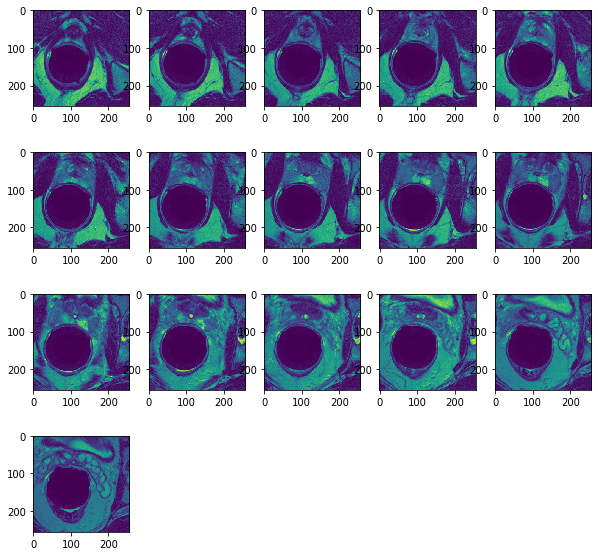

In [6]:
plt.figure(figsize=(10, 10))
for i in range (0, train_images['sample-0.npy'].shape[0]):
    plt.subplot(4, 5, i+1)
    plt.imshow(train_images['sample-0.npy'][i,:,:])#, cmap="bone", origin="lower"

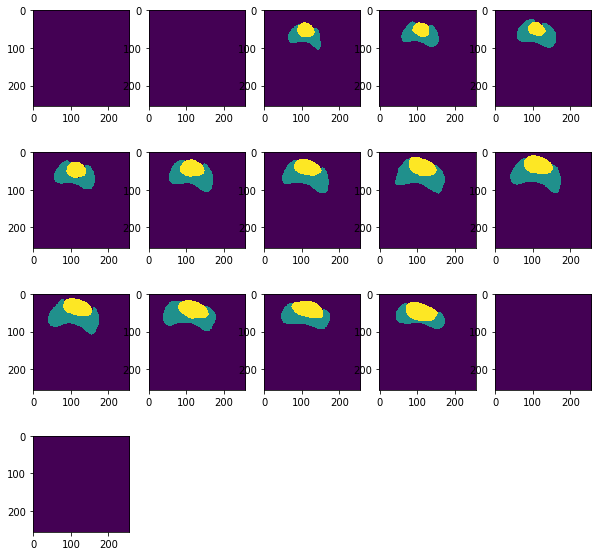

In [7]:
plt.figure(figsize=(10, 10))
for i in range (0, train_images['sample-0.npy'].shape[0]):
    plt.subplot(4, 5, i+1)
    plt.imshow(train_labels['sample-0.npy'][i,:,:])#, cmap="bone"

## Rotate images and labels (using imutils.rotate) without changing the image dimensions (cut edges)

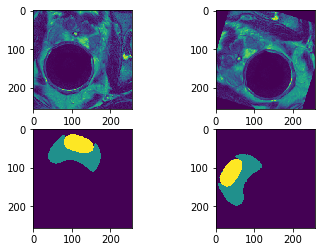

In [8]:
image = train_images['sample-0.npy'][10]
label = train_labels['sample-0.npy'][10]
rotated_image = imutils.rotate(image, 73)
rotated_label = imutils.rotate(label, 73)
plt.subplot(2,2,1)
plt.imshow(image)
plt.subplot(2,2,2)
plt.imshow(rotated_image)
plt.subplot(2,2,3)
plt.imshow(label)
plt.subplot(2,2,4)
plt.imshow(rotated_label)

## Rotate images and labels (using imutils.rotate_bound) keeping the edges --> different image dimensions

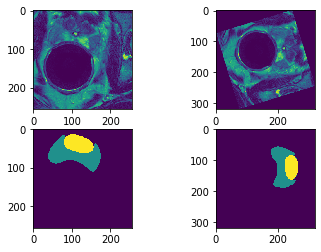

In [9]:
image = train_images['sample-0.npy'][10]
label = train_labels['sample-0.npy'][10]
rotated_image = imutils.rotate_bound(image, 73)
rotated_label = imutils.rotate_bound(label, 73)
plt.subplot(2,2,1)
plt.imshow(image)
plt.subplot(2,2,2)
plt.imshow(rotated_image)
plt.subplot(2,2,3)
plt.imshow(label)
plt.subplot(2,2,4)
plt.imshow(rotated_label)

## >> Training data augmentation using rotation without changing image dimensions

In [10]:
num_images = 0
for name in filenames:
    num_images = num_images+train_images[name].shape[0]
num_images

842

In [11]:
n = 20 # number of random rotations/image  (20 and 100)
data_augmented = np.zeros([n*num_images, 256, 256], dtype=np.uint16) # same dtype as the original images
labels_augmented = np.zeros([n*num_images, 256, 256], dtype=np.uint8)  # same dtype as the original labels 

ind = 0
for name in filenames:
    for i in range (0, train_images[name].shape[0]):
        for j in range (0, n):
        
            rotate = random.randint(0, 360)
        
            data_augmented[ind] = imutils.rotate(train_images[name][i], rotate, scale=1)
            labels_augmented[ind] = imutils.rotate(train_labels[name][i], rotate, scale=1)
            
            ind = ind + 1

In [12]:
print(data_augmented.shape)
print(data_augmented.dtype)
print(np.amin(data_augmented))
print(np.amax(data_augmented))

(16840, 256, 256)
uint16
0
1890


## Split the augmented dataset in training and test set

In [13]:
images_train, images_test, labels_train, labels_test = train_test_split(data_augmented, labels_augmented, 
                                                                        test_size = 0.2, random_state = 1337)

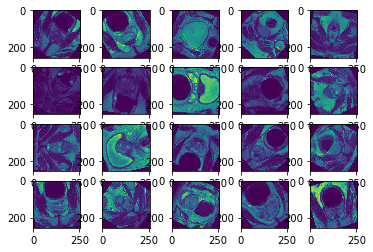

In [14]:
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(images_train[i,:,:])

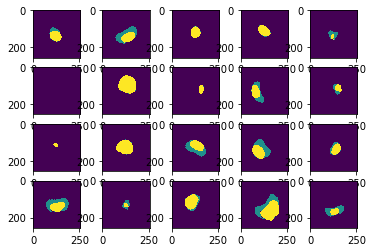

In [15]:
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(labels_train[i,:,:])

In [16]:
np.save("project3_data/augmented_data_20/images_train", images_train)
np.save("project3_data/augmented_data_20/labels_train", labels_train)
np.save("project3_data/augmented_data_20/images_test", images_test)
np.save("project3_data/augmented_data_20/labels_test", labels_test)